## Exercício 01 - Dimensionality Reduction With PCA
#### https://chrisalbon.com/machine_learning/feature_engineering/dimensionality_reduction_with_pca/


In [16]:
# Load libraries
from sklearn.preprocessing import StandardScaler #Normalizar 
from sklearn.decomposition import PCA #Redução de dimensionalidade
from sklearn import datasets #Banco de exemplos

In [6]:
# Load the data
digits = datasets.load_digits()

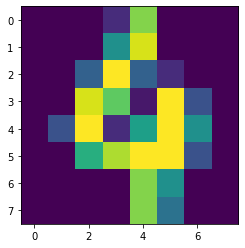

In [17]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[100])

In [18]:
digits.target[100]

4

In [19]:
# Standardize the feature matrix
X = StandardScaler().fit_transform(digits.data) #Normalizando as imagens

In [61]:
# Create a PCA that will retain 99% of the variance
pca = PCA(n_components=0.99, whiten=True)

In [62]:
# Conduct PCA
X_pca = pca.fit_transform(X)

In [63]:
# Show results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_pca.shape[1])

Original number of features: 64
Reduced number of features: 54


In [64]:
y = digits.target

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train, x_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=2)

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [69]:
y_pred = neigh.predict(x_test)

In [70]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [71]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)

In [72]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96        32
           1       0.88      1.00      0.94        44
           2       0.94      1.00      0.97        31
           3       0.94      0.94      0.94        36
           4       1.00      0.80      0.89        35
           5       0.97      0.91      0.94        43
           6       0.97      0.97      0.97        35
           7       0.93      1.00      0.96        40
           8       0.97      0.92      0.94        36
           9       0.92      0.86      0.89        28

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360



In [73]:
print(confusion_matrix(y_test,y_pred))

[[32  0  0  0  0  0  0  0  0  0]
 [ 0 44  0  0  0  0  0  0  0  0]
 [ 0  0 31  0  0  0  0  0  0  0]
 [ 0  1  1 34  0  0  0  0  0  0]
 [ 1  3  0  0 28  0  0  2  0  1]
 [ 1  0  1  2  0 39  0  0  0  0]
 [ 1  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  2  0  0  0  0  0  0 33  1]
 [ 0  0  0  0  0  1  1  1  1 24]]


In [32]:
!pip install scikit-plot
import scikitplot as skplt

In [74]:
#Dividindo em classes para poder utilizar a metrica roc_curve

y_test_class_0=[1 if y==0 else 0 for y in y_test]
y_pred_class_0=[1 if y==0 else 0 for y in y_pred]

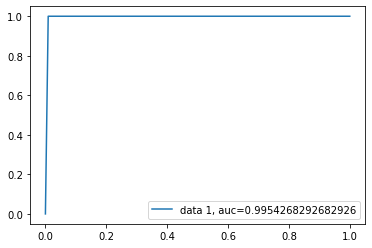

In [75]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_class_0, y_pred_class_0)
auc = metrics.roc_auc_score(y_test_class_0, y_pred_class_0)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [76]:
y_test_class_1=[1 if y==1 else 0 for y in y_test]
y_pred_class_1=[1 if y==1 else 0 for y in y_pred]

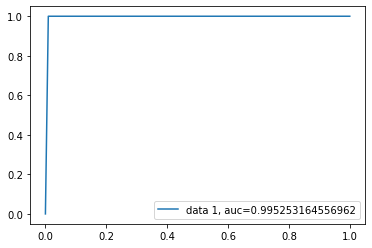

In [60]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_class_1, y_pred_class_1)
auc = metrics.roc_auc_score(y_test_class_1, y_pred_class_1)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Exercício 02 - Feature Extraction With PCA
#### https://chrisalbon.com/machine_learning/feature_engineering/feature_extraction_with_pca/

In [1]:
# Import packages
import numpy as np #trabalhar com vetores
from sklearn import decomposition, datasets #decomposition trabalhar com feature engineer e datasets para trabalhar com bancos
from sklearn.preprocessing import StandardScaler #normalizar

In [2]:
# Load the breast cancer dataset
dataset = datasets.load_breast_cancer()

# Load the features
X = dataset.data

In [3]:
print(dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
import pandas as pd

pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
# View the shape of the dataset
X.shape

(569, 30)

In [6]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [7]:
# Create a scaler object
sc = StandardScaler()

# Fit the scaler to the features and transform
X_std = sc.fit_transform(X)

In [8]:
pd.DataFrame(X_std)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [9]:
# Create a pca object with the 2 components as a parameter
pca = decomposition.PCA(n_components=2)

# Fit the PCA and transform the data
X_std_pca = pca.fit_transform(X_std)

In [14]:
df_pca=pd.DataFrame(X_std_pca,columns=['vetor1','vetor2'])
df_pca.head(5)

,vetor1,vetor2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


In [15]:
df_pca['target']=dataset.target
df_pca['color']=['red' if y==1 else 'blue' for y in df_pca.target.values]

In [16]:
df_pca.head(5)

,vetor1,vetor2,target,color
0,9.192837,1.948583,0,blue
1,2.387802,-3.768172,0,blue
2,5.733896,-1.075174,0,blue
3,7.122953,10.275589,0,blue
4,3.935302,-1.948072,0,blue


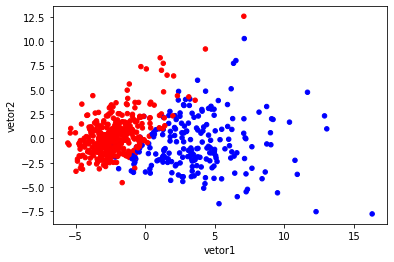

In [17]:
import matplotlib.pyplot as plt
ax1 = df_pca.plot.scatter(x='vetor1',
                      y='vetor2',
                      c='color')

In [18]:
y = dataset.target

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_std_pca,y)

In [21]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [23]:
clf.fit(x_train, y_train)

LogisticRegression()

In [24]:
y_pred = clf.predict(x_test)

In [25]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        61
           1       0.86      0.95      0.90        82

    accuracy                           0.88       143
   macro avg       0.89      0.87      0.88       143
weighted avg       0.89      0.88      0.88       143



In [27]:
print(accuracy_score(y_test,y_pred))

0.8811188811188811


In [28]:
print(confusion_matrix(y_test,y_pred))

[[48 13]
 [ 4 78]]


In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

clfs = [DecisionTreeClassifier(), SVC(), RandomForestClassifier(), LogisticRegression()]

def evaluate_classifier(clf,x_train, x_test, y_train, y_test):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(classification_report(y_test, y_pred))


for clf in clfs:
  print(clf)
  evaluate_classifier(clf, x_train, x_test, y_train, y_test)

DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.93      0.82      0.87        61
           1       0.88      0.95      0.91        82

    accuracy                           0.90       143
   macro avg       0.90      0.89      0.89       143
weighted avg       0.90      0.90      0.89       143

SVC()
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        61
           1       0.86      0.95      0.90        82

    accuracy                           0.88       143
   macro avg       0.89      0.87      0.88       143
weighted avg       0.89      0.88      0.88       143

RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        61
           1       0.92      0.95      0.93        82

    accuracy                           0.92       143
   macro avg       0.92      0.92      0.92       143
weighted avg      

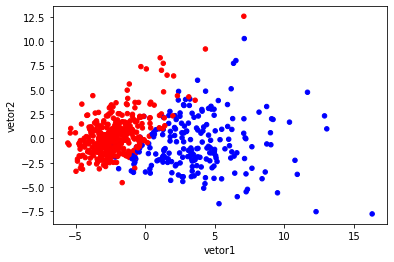

In [32]:
#plotando o todo
import matplotlib.pyplot as plt
ax1 = df_pca.plot.scatter(x='vetor1',
                      y='vetor2',
                      c='color')

In [33]:
clf = LogisticRegression()
clf.fit(X_std_pca, y)
y_pred = clf.predict(X_std_pca)
df_pca['target_pred'] = y_pred
df_pca['color_pred'] = ['red' if y==1 else 'blue' for y in y_pred]

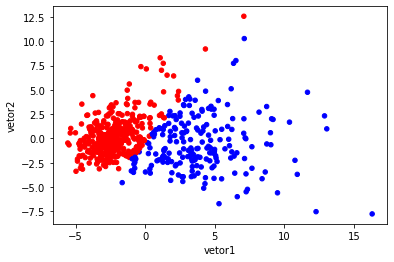

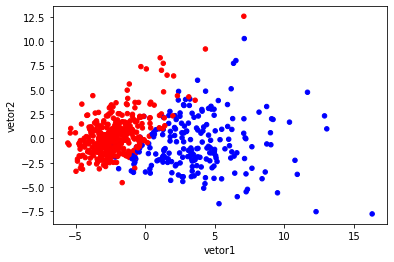

In [34]:
import matplotlib.pyplot as plt
ax1 = df_pca.plot.scatter(x='vetor1',
                      y='vetor2',
                      c='color_pred')
ax2 = df_pca.plot.scatter(x='vetor1',
                      y='vetor2',
                      c='color')

## Exercício 03 

In [1]:
from sklearn import datasets

In [2]:
diabetes_dataset=datasets.load_diabetes()

In [3]:
x = diabetes_dataset.data
y = diabetes_dataset.target

In [5]:
import pandas as pd
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [7]:
x_pca = pca.fit_transform(x)

In [8]:
from sklearn.cluster import KMeans

In [10]:
# Make k-means clusterer
clusterer = KMeans(3, random_state=1)

# Fit clusterer
clusterer.fit(x_pca)

KMeans(n_clusters=3, random_state=1)

In [11]:
df = pd.DataFrame(x_pca,columns = ['vetor1','vetor2'])
df.head(5)

,vetor1,vetor2
0,0.027931,-0.092601
1,-0.134686,0.065263
2,0.012945,-0.077764
3,0.002345,0.018182
4,-0.035981,0.038621


In [12]:
df['grupo'] = clusterer.predict(x_pca)

In [13]:
df['cor']=['green' if grupo==1 else grupo for grupo in df.grupo.values]
df['cor']=['red' if grupo==0 else grupo for grupo in df.cor.values]
df['cor']=['blue' if grupo==2 else grupo for grupo in df.cor.values]

In [14]:
df

,vetor1,vetor2,grupo,cor
0,0.027931,-0.092601,1,green
1,-0.134686,0.065263,2,blue
2,0.012945,-0.077764,1,green
3,0.002345,0.018182,1,green
4,-0.035981,0.038621,2,blue
...,...,...,...,...
437,0.058958,-0.049275,1,green
438,0.060155,0.036211,0,red
439,-0.009763,-0.057337,1,green
440,0.032956,0.009994,1,green


<AxesSubplot:xlabel='vetor1', ylabel='vetor2'>

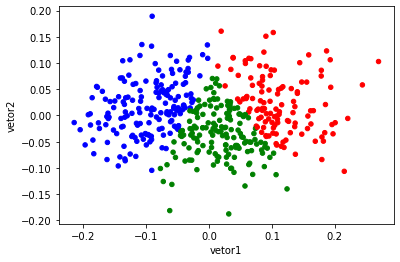

In [15]:
df.plot.scatter(x='vetor1', y='vetor2', c='cor')

In [16]:
df_original = pd.DataFrame(x)
df_original['diabetes'] = y

In [17]:
df_original['grupo']=df.grupo

In [20]:
grupo1=df_original[df_original.grupo==1]
grupo1.diabetes.mean()

164.53548387096774

In [21]:
grupo2=df_original[df_original.grupo==2]
grupo2.diabetes.mean()

107.8622754491018

In [22]:
grupo3=df_original[df_original.grupo==0]
grupo3.diabetes.mean()

197.725

In [26]:
grupo3.iloc[:,0].mean() #analisando pela idade

0.022910058400417425

In [24]:
grupo1.iloc[:,0].mean()

0.008546884186426393

## Exercício 04 - Avaliação de alunos
#### Dataset: https://github.com/yanndupis/Building-a-Student-Intervention-System/blob/master/student-data.csv

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/yanndupis/Building-a-Student-Intervention-System/master/student-data.csv')

In [4]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,no,5,5,4,4,5,4,11,no
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,3,yes
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,no,5,5,3,3,3,3,3,no
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,no,4,4,1,3,4,5,0,yes


In [5]:
x = df.drop(['passed'], axis=1)

In [6]:
y = df['passed']

In [7]:
x_onehot = pd.get_dummies(x)

In [8]:
x_onehot

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,...,1,0,0,1,0,1,1,0,1,0
391,17,3,1,2,1,0,2,4,5,3,...,1,0,1,0,0,1,0,1,1,0
392,21,1,1,1,1,3,5,5,3,3,...,1,0,1,0,0,1,1,0,1,0
393,18,3,2,3,1,0,4,4,1,3,...,1,0,1,0,0,1,0,1,1,0


In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_onehot)

In [10]:
df_pca = pd.DataFrame(x_pca, columns=['vetor1','vetor2'])

In [11]:
y_numeric = [1 if y=='yes' else 0 for y in y]

In [12]:
df_pca['passou'] = y_numeric
df_pca.head(5)

,vetor1,vetor2,passou
0,0.309113,-1.029716,0
1,-1.786774,-0.497066,0
2,4.246748,0.412057,1
3,-3.759409,-2.427049,1
4,-1.755814,-1.034944,1


In [13]:
df_pca['cor'] = ['red' if y==0 else 'blue' for y in df_pca.passou.values]

<AxesSubplot:xlabel='vetor1', ylabel='vetor2'>

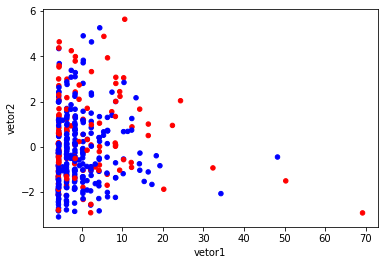

In [14]:
df_pca.plot.scatter(x='vetor1', y='vetor2', c='cor')

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pca, y)

In [16]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.37      0.23      0.28        31
         yes       0.70      0.82      0.76        68

    accuracy                           0.64        99
   macro avg       0.53      0.52      0.52        99
weighted avg       0.60      0.64      0.61        99



In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_onehot, y)

In [19]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.60      0.20      0.30        30
         yes       0.73      0.94      0.82        69

    accuracy                           0.72        99
   macro avg       0.67      0.57      0.56        99
weighted avg       0.69      0.72      0.66        99



In [21]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[ 6 24]
 [ 4 65]]


## Exercício 05 - Selecting The Best Number Of Components For LDA
#### https://chrisalbon.com/machine_learning/feature_engineering/select_best_number_of_components_in_lda/

In [22]:
# Load libraries
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [23]:
# Load the Iris flower dataset:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [25]:
# Create and run an LDA
lda = LinearDiscriminantAnalysis(n_components=None)
x_lda = lda.fit(X, y)

In [26]:
# Create array of explained variance ratios
lda_var_ratios = lda.explained_variance_ratio_

In [27]:
# Create a function
def select_n_components(var_ratio, goal_var: float) -> int:
    # Set initial variance explained so far
    total_variance = 0.0
    
    # Set initial number of features
    n_components = 0
    
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        
        # Add the explained variance to the total
        total_variance += explained_variance
        
        # Add one to the number of components
        n_components += 1
        
        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break
            
    # Return the number of components
    return n_components

In [ ]:
select_n_components(lda_var_ratios, 0.95)

## Exercício 06 - ANOVA F-value For Feature Selection

#### https://chrisalbon.com/machine_learning/feature_selection/anova_f-value_for_feature_selection/

In [11]:
# Load libraries
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest #Seleciona melhores dimensões
from sklearn.feature_selection import f_classif #Tecnica para selecionar melhor dimensão

In [8]:
# Load iris data
iris = load_iris()

# Create features and target
x = iris.data
y = iris.target

In [9]:
# Create an SelectKBest object to select features with two best ANOVA F-Values
fvalue_selector = SelectKBest(f_classif, k=2)

# Apply the SelectKBest object to the features and target
x_kbest = fvalue_selector.fit_transform(X, y)

In [10]:
# Show results
print('Original number of features:', x.shape[1])
print('Reduced number of features:', x_kbest.shape[1])

Original number of features: 4
Reduced number of features: 2


## Exercício 07 - Avaliação de alunos com seleção de feature

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/yanndupis/Building-a-Student-Intervention-System/master/student-data.csv')

In [3]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,no,5,5,4,4,5,4,11,no
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,3,yes
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,no,5,5,3,3,3,3,3,no
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,no,4,4,1,3,4,5,0,yes


In [5]:
x = df.drop(['passed'],axis=1)

In [6]:
y = df['passed']

In [7]:
x_onehot = pd.get_dummies(x)

In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [10]:
fvalue_selector = SelectKBest(f_classif, k=2)

# Apply the SelectKBest object to the features and target
X_kbest = fvalue_selector.fit_transform(x_onehot, y)

In [11]:
cols = fvalue_selector.get_support(indices=True)
x_df_new = x_onehot.iloc[:,cols]
x_df_new

,failures,goout
0,0,4
1,0,3
2,3,2
3,0,2
4,0,2
...,...,...
390,2,4
391,0,5
392,3,3
393,0,1


In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca= pca.fit_transform(x_df_new)

In [14]:
df_pca = pd.DataFrame(x_pca,columns=['vetor1','vetor2'])

In [16]:
y_numeric = [1 if y=='yes' else 0 for y in y]

In [17]:
df_pca['passou'] = y_numeric
df_pca.head(5)

,vetor1,vetor2,passou
0,0.833064,-0.460226,0
1,-0.156304,-0.314792,0
2,-0.709370,2.798746,1
3,-1.145672,-0.169358,1
4,-1.145672,-0.169358,1


In [18]:
df_pca['cor'] = ['red' if y == 0 else 'blue' for y in df_pca.passou.values]

<AxesSubplot:xlabel='vetor1', ylabel='vetor2'>

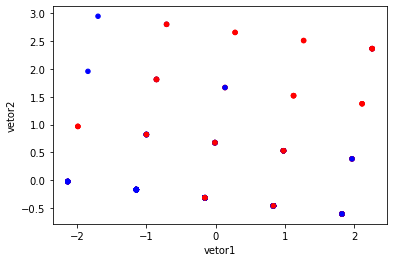

In [19]:
df_pca.plot.scatter(x = 'vetor1', y = 'vetor2', c = 'cor')

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x_pca, y)

In [21]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.57      0.25      0.35        32
         yes       0.72      0.91      0.80        67

    accuracy                           0.70        99
   macro avg       0.64      0.58      0.58        99
weighted avg       0.67      0.70      0.66        99



In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_df_new, y)

In [25]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.56      0.29      0.38        31
         yes       0.73      0.90      0.81        68

    accuracy                           0.71        99
   macro avg       0.65      0.59      0.60        99
weighted avg       0.68      0.71      0.67        99



In [28]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[ 9 22]
 [ 7 61]]


In [30]:
from sklearn.svm import SVC
clf=SVC()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.52      0.39      0.44        31
         yes       0.75      0.84      0.79        68

    accuracy                           0.70        99
   macro avg       0.64      0.61      0.62        99
weighted avg       0.68      0.70      0.68        99



In [32]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[12 19]
 [11 57]]


## Exercício 08 - Chi-Squared For Feature Selection
#### https://chrisalbon.com/machine_learning/feature_selection/chi-squared_for_feature_selection/

In [11]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [12]:
 #Load iris data
iris = load_iris()

# Create features and target
x = iris.data
y = iris.target

# Convert to categorical data by converting data to integers
x = x.astype(int)

In [13]:
chi2_selector = SelectKBest(chi2, k=2)
x_kbest = chi2_selector.fit_transform(x, y)

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_kbest, y)

In [15]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()
clf.fit(x_train, y_train)

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier()

In [16]:
y_pred = clf.predict(x_test)

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.95      0.97        19
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



## Exercício 09 - Drop Highly Correlated Features
#### https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/

In [20]:
# Load libraries
import pandas as pd
import numpy as np

In [21]:
# Create feature matrix with two highly correlated features
x = np.array([[1, 1, 1],
              [2, 2, 0],
              [3, 3, 1],
              [4, 4, 0],
              [5, 5, 1],
              [6, 6, 0],
              [7, 7, 1],
              [8, 7, 0],
              [9, 7, 1]])

# Convert feature matrix into DataFrame
df = pd.DataFrame(x)

# View the data frame
df

,0,1,2
0,1,1,1
1,2,2,0
2,3,3,1
3,4,4,0
4,5,5,1
5,6,6,0
6,7,7,1
7,8,7,0
8,9,7,1


In [24]:
# Create correlation matrix
corr_matrix = df.corr().abs()
corr_matrix

,0,1,2
0,1.000000,0.976103,0.000000
1,0.976103,1.000000,0.034503
2,0.000000,0.034503,1.000000


In [25]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,0,1,2
0,NaN,0.976103,0.000000
1,NaN,NaN,0.034503
2,NaN,NaN,NaN


In [26]:
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [27]:
# Drop features 
df.drop(df[to_drop], axis=1)

,0,2
0,1,1
1,2,0
2,3,1
3,4,0
4,5,1
5,6,0
6,7,1
7,8,0
8,9,1


## Exercício 10 - Recursive Feature Elimination
#### https://chrisalbon.com/machine_learning/feature_selection/recursive_feature_elimination/

In [29]:
from sklearn.datasets import load_boston #Dataset de preço de imoveis
from sklearn.feature_selection import RFECV #Selecionar s features
from sklearn import datasets, linear_model #Modelo linear
import warnings #esconder avisos

In [30]:
boston = load_boston()
x = boston.data
y = boston.target

In [31]:
ols = linear_model.LinearRegression()

In [32]:
# Create recursive feature eliminator that scores features by mean squared errors
rfecv = RFECV(estimator=ols, step=1, scoring='neg_mean_squared_error')

# Fit recursive feature eliminator 
rfecv.fit(x, y)

# Recursive feature elimination
rfecv.transform(x)

array([[ 0.    ,  0.538 ,  6.575 ,  4.09  , 15.3   ,  4.98  ],
       [ 0.    ,  0.469 ,  6.421 ,  4.9671, 17.8   ,  9.14  ],
       [ 0.    ,  0.469 ,  7.185 ,  4.9671, 17.8   ,  4.03  ],
       ...,
       [ 0.    ,  0.573 ,  6.976 ,  2.1675, 21.    ,  5.64  ],
       [ 0.    ,  0.573 ,  6.794 ,  2.3889, 21.    ,  6.48  ],
       [ 0.    ,  0.573 ,  6.03  ,  2.505 , 21.    ,  7.88  ]])

In [33]:
rfecv.n_features_

6

In [34]:
X.shape

(150, 4)